In [123]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from os import path
from pathlib import Path  

#pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [140]:
#list of all drugs
drug_list = [
    "Vorinostat",
    "Trastuzumab",
    "Tideglusib",
    "Lapatinib",
    "Methotrexate",
    "Mirdametinib",
    "MK-2206",
    "Nintedanib",
    "Paclitaxel",
    "Pertuzumab",
    "Pictilisib",
    "Refametinib",
    "Rituximab",
    "Romidepsin",
    "Selumetinib",
    "SHP099 dihydrochloride",
    "Staurosporine",
    "A485",
    "A486",
    "Afatinib",
    "AZD-4547",
    "AZD-8055",
    "Bortezomib",
    "Carfilzomib",
    "CUDC-101",
    "Curcumin",
    "Cytarabine",
    "Dactolisib",
    "Dasatinib",
    "Gefitinib",
    "Imatinib"
]


In [196]:
pd.reset_option('^display.', silent=True)
column_names = ['Gene Name']
drug_table = pd.DataFrame(columns = column_names)

for i in range(len(drug_list)):
    drug = drug_list[i]
    drug_file_name = drug + "_ddPTM_aggregated.csv"
    drug_file_path = path.join("Raw Data/", drug_file_name)
    
    data_raw = pd.read_csv(drug_file_path)
    data_raw['Gene Name'].dropna(inplace=True)
    
    data_raw=data_raw[data_raw['Modification Type'] == 'Phospho']
    data_raw= data_raw[['Gene Name',"Uniprot","Protein Name",'Cell Line', 'Duration',"Average Fold Change"]]
    
    #group by genes and take the mean across cell type and duration
    data_raw=data_raw.groupby(by ='Gene Name').mean()
    
    #rename the average fold change column to just the drug name 
    data_raw.rename(columns = {"Gene Name":'Gene Name',"Average Fold Change":drug},inplace=True)
    #print(data_raw)
    #merge the individual drug data frames into a single larger one
    drug_table = drug_table.merge(data_raw,how ='outer', on = 'Gene Name')
 
    
drug_table.fillna(1,inplace=True)

for col in drug_table.columns:
    if col == 'Gene Name':
        continue
    drug_table[col] = drug_table[col].replace(0,0.01)
    drug_table[col] = np.log2(drug_table[col])

drug_table.set_index('Gene Name')

,Vorinostat,Trastuzumab,Tideglusib,Lapatinib,Methotrexate,Mirdametinib,MK-2206,Nintedanib,Paclitaxel,Pertuzumab,...,AZD-8055,Bortezomib,Carfilzomib,CUDC-101,Curcumin,Cytarabine,Dactolisib,Dasatinib,Gefitinib,Imatinib
Gene Name,,,,,,,,,,,,,,,,,,,,,
CDKN1A,1.118981,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,1.063949,1.014863,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
MYC,-1.283502,0.000000,0.0,-2.080310,0.0,0.0,-1.34804,0.0,0.0,0.0,...,0.0,1.478960,1.625027,-1.548621,-1.903853,0.0,0.0,-1.426963,-1.094098,0.000000
ABCF1,0.000000,-1.063593,0.0,-2.246720,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.453365,0.495262,0.000000,1.989323,0.0,0.0,0.000000,0.000000,0.000000
ABL1,0.000000,1.535175,0.0,1.250836,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,-1.574063,-1.244458,3.338933,-1.174609,0.0,0.0,-3.085281,0.000000,-1.964993
ACACA,0.000000,-1.702935,0.0,2.351067,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,1.685774,1.725736,0.000000,0.000000,0.0,0.0,-1.443259,-2.134937,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GRB2,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,-6.643856
MYO1D,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,4.151636
PLEKHA4,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,-6.643856


C:\Users\krish\anaconda3\lib\site-packages\seaborn\matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


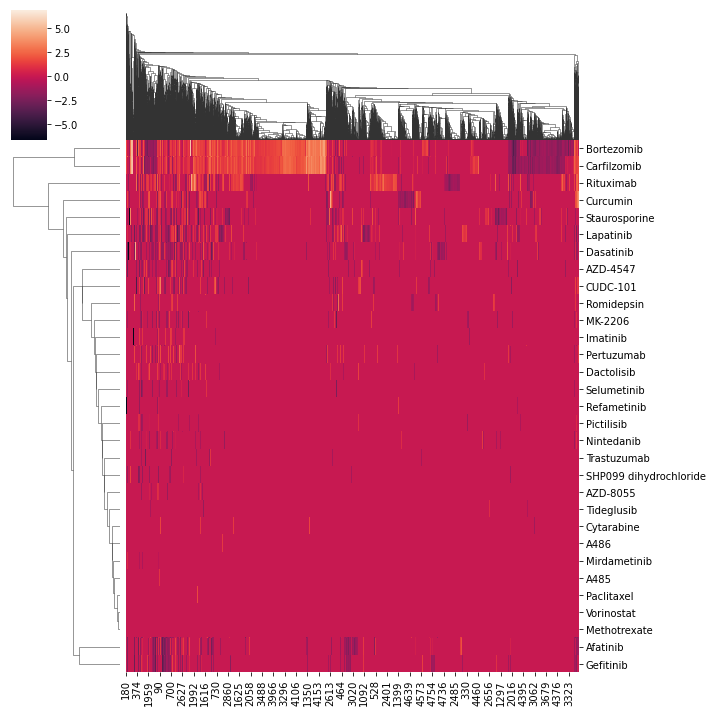

In [197]:
sns.clustermap(drug_table.iloc[:,1:].T)

In [185]:
gene_list = drug_table['Gene Name'][drug_table["Mirdametinib"] < 0].tolist()
with open(r'gene_list.txt', 'w') as fp:
    fp.write('\n'.join(gene_list))

In [187]:
pd.reset_option('^display.', silent=True)
column_names = ['Gene Name']
drug_table = pd.DataFrame(columns = column_names)

for i in range(len(drug_list)):
    drug = drug_list[i]
    drug_file_name = drug + "_ddPTM_aggregated.csv"
    drug_file_path = path.join("Raw Data/", drug_file_name)
    
    data_raw = pd.read_csv(drug_file_path)
    data_raw['Gene Name'].dropna(inplace=True)
    
    data_raw=data_raw[data_raw['Modification Type'] == 'Phospho']
    data_raw= data_raw[['Gene Name',"Uniprot","Protein Name",'Cell Line', 'Duration',"Max -Log10(EC50)"]]
    
    #group by genes and take the mean across cell type and duration
    data_raw=data_raw.groupby(by ='Gene Name').mean()
    
    #rename the average fold change column to just the drug name 
    data_raw.rename(columns = {"Gene Name":'Gene Name',"Max -Log10(EC50)":drug},inplace=True)
    #print(data_raw)
    #merge the individual drug data frames into a single larger one
    drug_table = drug_table.merge(data_raw,how ='outer', on = 'Gene Name')
 
    
drug_table.fillna(0,inplace=True)

#for col in drug_table.columns:
#    if col == 'Gene Name':
#        continue
#    drug_table[col] = drug_table[col].replace(0,0.01)
#    drug_table[col] = np.log2(drug_table[col])

drug_table.set_index('Gene Name')

,Vorinostat,Trastuzumab,Tideglusib,Lapatinib,Methotrexate,Mirdametinib,MK-2206,Nintedanib,Paclitaxel,Pertuzumab,...,AZD-8055,Bortezomib,Carfilzomib,CUDC-101,Curcumin,Cytarabine,Dactolisib,Dasatinib,Gefitinib,Imatinib
Gene Name,,,,,,,,,,,,,,,,,,,,,
CDKN1A,5.081094,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,7.461682,6.919690,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
MYC,6.154517,0.000000,0.0,6.247356,0.0,0.0,7.03845,0.0,0.0,0.0,...,0.0,6.865853,6.818067,6.724576,4.508865,0.0,0.0,6.165824,6.825199,0.000000
ABCF1,0.000000,-3.746832,0.0,6.820852,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,8.041146,7.943964,0.000000,4.908238,0.0,0.0,0.000000,0.000000,0.000000
ABL1,0.000000,-4.738236,0.0,6.755276,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,8.086075,7.957427,4.253295,4.178507,0.0,0.0,8.375329,0.000000,6.716662
ACACA,0.000000,-4.586700,0.0,6.629814,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,7.596291,7.458059,0.000000,0.000000,0.0,0.0,5.502117,6.555864,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GRB2,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,6.641596
MYO1D,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,5.849879
PLEKHA4,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,5.660320


In [192]:
import scipy
clustering =scipy.cluster.hierarchy.linkage(drug_table.iloc[:,1:], method='complete')

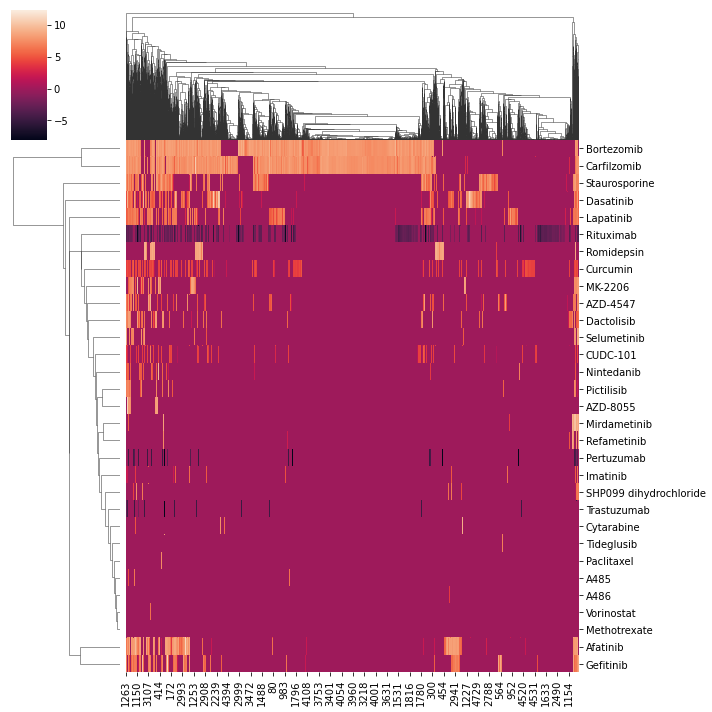

In [195]:
sns.clustermap(drug_table.iloc[:,1:].T)